# The Iris Data Classifier

The purpose of this activity is to design a classifier that can tell the difference between three species of the Iris flower: the setosa, virginica and versicolor. The data consists of measurements in centimeters of the length and width of the sepal and petal parts of the flower. See the figure below (source: Google). Based on the images, these flowers look very similar and the goal is to see if some differences can be detected by an automated classification algorithm. We will use basic algorithms like random forests and logistic regression since this is a simple 3-class classifier -- but we will only do a two-way classifier (e.g., setosa or not setosa).




In [77]:
#!/usr/bin/python

import pandas as pd
from matplotlib import pyplot as plt
import sklearn.datasets

from matplotlib import pyplot as plt
import sklearn
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


## Feature Engineering

Start with the raw features as they are. You can modify them later.

In [78]:
df = pd.read_csv("iris.csv")
#df["sr"] = df["sl"]/df["sw"] # add new features: ratios
#df["pr"] = df["pl"]/df["pw"]
#df["ss"] = df["sl"]*df["sw"] # add new features: products (interactions)
#df["pp"] = df["pl"]*df["pw"]
#df["wx"] = df["sw"]*df["pw"] # add new features: x-products (interactions)
#df["lx"] = df["sl"]*df["pl"]
#df["swl"] = df["sw"]*df["pl"] # add new features: xx-products (interactions)
#df["pwl"] = df["pw"]*df["sl"]
df.head(5)

species   sl   sw   pl   pw
0  setosa  4.6  3.6  1.0  0.2
1  setosa  4.3  3.0  1.1  0.1
2  setosa  5.8  4.0  1.2  0.2
3  setosa  5.0  3.2  1.2  0.2
4  setosa  4.4  3.2  1.3  0.2

## Setup Classifier
Choose the species you want to classify and setup the training vs testing data. You may want to check each species first. Some may be easier than others to classify.

In [79]:
# setup train and test data
X, Y = df[df.columns[1:13]], (df['species']=='versicolor') # versicolor, setosa, virginica
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3)
X_train.head(10)

sl   sw   pl   pw
107  5.9  3.0  5.1  1.8
73   6.4  2.9  4.3  1.3
127  6.7  2.5  5.8  1.8
43   5.0  3.4  1.6  0.4
100  6.0  3.0  4.8  1.8
53   5.7  2.6  3.5  1.0
26   5.3  3.7  1.5  0.2
111  5.8  2.7  5.1  1.9
70   5.7  2.9  4.2  1.3
3    5.0  3.2  1.2  0.2

## Train classifier and make predictions
Try two of the most common classifiers: regression and random forest. Plot the AUC curves to inspect their performance.

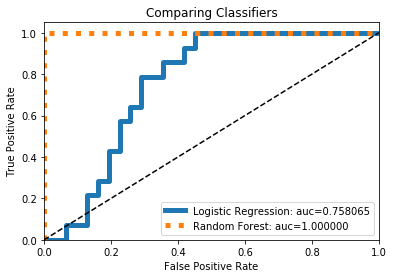

In [91]:
name = "Logistic Regression"
line_fmt = "-"
model =  LogisticRegression()
model.fit(X_train, Y_train)
preds = model.predict_proba(X_test)
pred = pd.Series(preds[:,1])
fpr, tpr, thresholds = roc_curve(Y_test, pred)
auc_score = auc(fpr, tpr)
label='%s: auc=%f' % (name, auc_score)
plt.plot(fpr, tpr, line_fmt, linewidth=5, label=label)

lr_coef = model.coef_ # added: get coeff for inspection
lr_pred = pred

name = "Random Forest"
line_fmt = ":"
model =  RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
model.fit(X_train, Y_train)
preds = model.predict_proba(X_test)
pred = pd.Series(preds[:,1])
fpr, tpr, thresholds = roc_curve(Y_test, pred)
auc_score = auc(fpr, tpr)
label='%s: auc=%f' % (name, auc_score)
plt.plot(fpr, tpr, line_fmt, linewidth=5, label=label)

rf_feat = model.feature_importances_ # added: get coeff for inspection
rf_pred = pred

plt.legend(loc="lower right")
plt.title('Comparing Classifiers')

plt.plot([0, 1], [0, 1], 'k--') #x=y line.  Visual aid
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Interpret results
Which features are the most important? What is the AUC telling us?
Now go back and fiddle with the features by uncommenting some of the lines above in the feature engineering section and keep iterating.

In [92]:
lr_coef

array([[ 0.36428177, -1.49516141,  0.52153663, -0.97841553]])

In [93]:
rf_feat

array([0.09772041, 0.07900759, 0.42836351, 0.39490849])

## Thresholds
Inspect the truth versus predicted results. Each point on the AUC plot represents a threshold choice.

Where would you draw the line? How many false-positives and false-negatives result from your choice, i.e., how much error (and what kind) can you tolerate? Try sorting by each model separately. How do the models compare? How does this affect your choice?

What if you took an average of both models? This is a common strategy, in fact, to run multiple models and combine them together. What is this called?

Do you understand now how AUC works?

In [99]:
thresh = pd.DataFrame({'truth':Y_test.values, 'lr_pred':lr_pred, 'rf_pred':rf_pred})
thresh.sort_values(by=['rf_pred'], ascending=False)

lr_pred   rf_pred  truth
39  0.445850  0.995000   True
0   0.510542  0.988333   True
23  0.453719  0.988333   True
37  0.424733  0.988333   True
24  0.539802  0.988333   True
22  0.435364  0.988333   True
19  0.489896  0.975833   True
8   0.317207  0.959286   True
27  0.366800  0.959286   True
20  0.424006  0.902619   True
14  0.700739  0.833333   True
13  0.567341  0.788333   True
7   0.522455  0.402619   True
42  0.259942  0.214286   True
36  0.349274  0.164286  False
31  0.416071  0.100000  False
34  0.205559  0.100000  False
43  0.211018  0.064286  False
16  0.174570  0.064286  False
2   0.150408  0.033333  False
5   0.248034  0.033333  False
25  0.246035  0.033333  False
17  0.195871  0.033333  False
12  0.132534  0.033333  False
32  0.202715  0.033333  False
3   0.295894  0.014286  False
30  0.135567  0.014286  False
9   0.346618  0.014286  False
38  0.084907  0.000000  False
33  0.440236  0.000000  False
40  0.731596  0.000000  False
41  0.076687  0.000000  False
35  0.088004  0.000000  False
6   0.752604  0.000000  False
29  0.524295  0.000000  False
28  0.431312  0.000000  False
26  0.666984  0.000000  False
4   0.069727  0.000000  False
1   0.401673  0.000000  False
21  0.101565  0.000000  False
18  0.119834  0.000000  False
15  0.074330  0.000000  False
11  0.626512  0.000000  False
10  0.464469  0.000000  False
44  0.511592  0.000000  False